<a href="https://colab.research.google.com/github/asheerali/piaic_neuralnetworks/blob/main/DL_1_practical_example_with_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [168]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [169]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()


In [172]:
test_labels.shape

(10000,)

In [171]:
test_labels[1]

2

Checking and ploting the image on a specific index

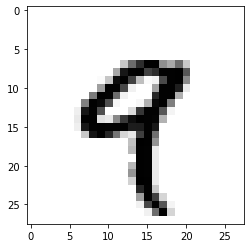

In [123]:
digit = train_images[4]
plt.imshow(digit,cmap= plt.cm.binary)
plt.show()

In [124]:
digit.shape

(28, 28)

In [125]:
train_labels[4]

9

Network Architecture


In [126]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Compiling the Data

In [127]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Preparing the features (reshaping and normalizing)

In [128]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

Preparing the labels

In [129]:
from tensorflow.keras.utils import to_categorical

In [130]:
train_labels=to_categorical(train_labels) #one hot encoding
test_labels=to_categorical(test_labels)

Training the model

In [131]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2553 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1050 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0687 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0503 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9885


Evaluation/Testing of our model

In [132]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9782


Predicting with our model

In [133]:
network.predict(test_images)

array([[9.37271771e-09, 7.19386148e-11, 4.18320042e-07, ...,
        9.99974608e-01, 1.21687522e-08, 4.11646511e-07],
       [8.79822864e-12, 1.70424002e-07, 9.99999762e-01, ...,
        3.30448356e-18, 8.15976620e-09, 4.34898823e-16],
       [2.32102082e-07, 9.99272764e-01, 2.52276732e-05, ...,
        3.42465239e-04, 2.16014843e-04, 1.10805559e-06],
       ...,
       [6.98232298e-14, 1.05588867e-12, 9.84485049e-14, ...,
        1.98283857e-07, 3.42069519e-08, 7.73874092e-07],
       [1.02635389e-09, 2.18604843e-12, 6.68239877e-13, ...,
        1.33893896e-10, 6.64271101e-06, 1.43720001e-11],
       [1.31277975e-10, 3.87865196e-15, 1.45341819e-08, ...,
        3.44264556e-15, 1.01850345e-13, 8.39100274e-13]], dtype=float32)

In [134]:
answers = network.predict(test_images)

In [142]:
digit = test_images[4]
digit.shape

(784,)

In [146]:
digit= digit.reshape(28,28)

In [147]:
digit.shape

(28, 28)

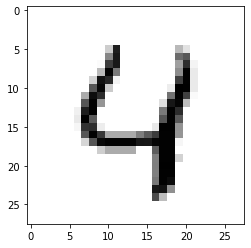

In [149]:
plt.imshow(digit, cmap= plt.cm.binary)
plt.show()

In [166]:
len(answers)

10000

In [167]:
answers.shape

(10000, 10)

In [165]:
answers[0]

array([9.3727177e-09, 7.1938615e-11, 4.1832004e-07, 2.4393787e-05,
       4.3437398e-12, 2.3414270e-08, 5.7423932e-16, 9.9997461e-01,
       1.2168752e-08, 4.1164651e-07], dtype=float32)

In [153]:
for i in range(len(answers)):
  reshaped_image=answers[i].reshape(28,28)
  plt.imshow(reshaped_image,cmap= plt.cm.binary)
  plt.show()

ValueError: ignored